In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter( action="ignore", category=FutureWarning)
warnings.simplefilter( action="ignore", category=UserWarning)
warnings.simplefilter( action="ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [3]:
path = "../../data/faradars/detailedList"

listDatasets = np.array( os.listdir( path))

listDatasets = listDatasets[ np.flatnonzero( np.core.defchararray.find( listDatasets, "csv") != -1)]

print( listDatasets)

['list-1691940364026.csv' 'list-1691943764303.csv'
 'list-1692005928622.csv' 'list-1692006162988.csv'
 'list-1692006371669.csv']


In [4]:
dfs = []

for ds in listDatasets:
	dfs.append( pd.read_csv( f"{ path}/{ ds}"))

df = pd.concat( dfs)

df.head()

,id,title,price,language,categories,categories_fa,createdAt,duration,type,sold_n,rating,rating_n
0,9233420,سوالات و پاسخنامه کنکور کارشناسی ارشد علوم زمی...,0,fa,geology|min-geosciences,زمین‌شناسی|مهندسی معدن و علوم زمین,2023-07-11T20:03:15.000000Z,0,book,1,0.0,0
1,9233417,سوالات و پاسخنامه کنکور کارشناسی ارشد آموزش مه...,0,fa,engineering,فنی و مهندسی,2023-07-11T16:54:54.000000Z,0,book,1,0.0,0
2,9233488,سوالات و پاسخنامه کنکور کارشناسی ارشد زراعت و ...,0,fa,academic-courses|postgraduate-entrance|agricul...,آموزش‌های دانشگاهی|تحصیلات تکمیلی|مهندسی کشاورزی,2023-07-15T21:34:37.000000Z,0,book,0,0.0,0
3,9233450,سوالات و پاسخنامه کنکور کارشناسی ارشد فقه و حق...,0,fa,humanities|law,علوم انسانی|حقوق,2023-07-13T14:24:28.000000Z,0,book,0,0.0,0
4,9233422,سوالات و پاسخنامه کنکور کارشناسی ارشد فوتونیک ...,0,fa,science|engineering|electrical-engineering,علوم پایه و میان‌رشته‌ای|فنی و مهندسی|مهندسی برق,2023-07-11T21:09:16.000000Z,0,book,1,0.0,0


In [5]:
df[ "type"].unique()

array(['book', 'course', 'exam', 'podcast', 'pack', 'blind', 'webinar'],
      dtype=object)

In [6]:
courses = df[ df[ "type"] == "course"]

courses = courses[ [ "id", "price", "categories", "createdAt", "duration", "sold_n"]]

courses.head()

,id,price,categories,createdAt,duration,sold_n
5,9232625,699000,music|vocal|music-software,2023-03-13T07:46:13.000000Z,122,1
7,9232532,499000,engineering|management|project-management,2023-02-22T04:49:10.000000Z,108,7
8,9232900,699000,electrical-engineering|mechanical-engineering|...,2023-05-10T12:11:40.000000Z,147,6
9,9232717,799000,physics,2023-04-10T06:28:04.000000Z,409,1
10,9233218,449000,programming-languages|php|web-design,2023-06-19T04:36:07.000000Z,144,2


In [7]:
courses_n = len( courses)

print( f"Total number of courses: { courses_n}")

Total number of courses: 6598


In [8]:
free_courses = courses[ courses[ "price"] == 0]

free_courses_n = len( free_courses)

print( f"Total number of free courses: { free_courses_n}")

Total number of free courses: 2202


In [9]:
paid_courses = courses[ courses[ "price"] != 0]

paid_courses_n = len( paid_courses)

print( f"Total number of paid courses: { paid_courses_n}")

Total number of paid courses: 4396


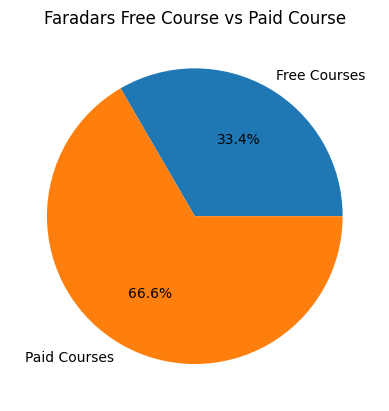

In [10]:
plt.pie( [ free_courses_n, paid_courses_n], labels=[ "Free Courses", "Paid Courses"], autopct="%1.1f%%")
plt.title( "Faradars Free Course vs Paid Course")
plt.show()

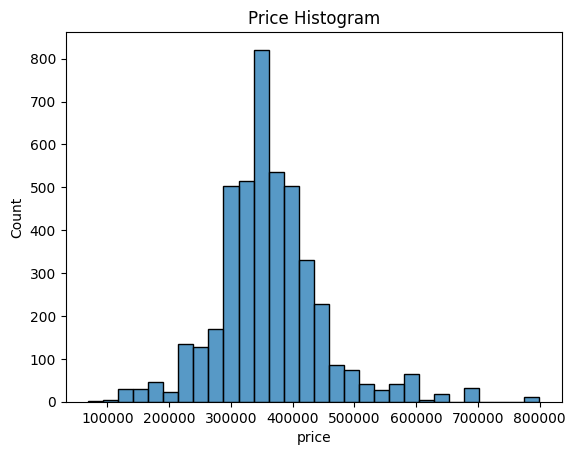

In [11]:
sns.histplot( paid_courses, x="price", bins=30)
plt.title( "Price Histogram")
plt.show()

In [12]:
print( f"Minimum Price: { paid_courses[ 'price'].min()}")
print( f"Maximum Price: { paid_courses[ 'price'].max()}")

Minimum Price: 69000
Maximum Price: 799000


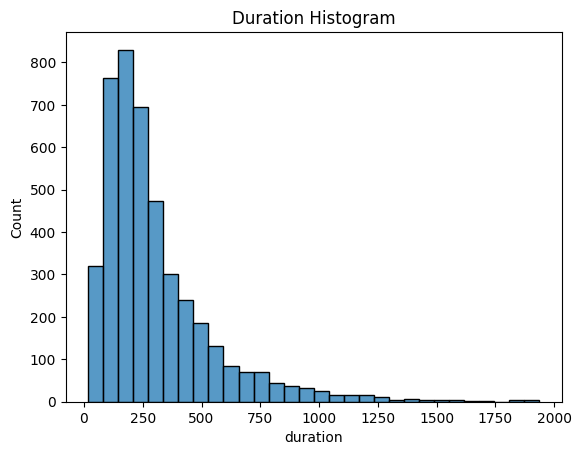

In [13]:
sns.histplot( paid_courses, x="duration", bins=30)
plt.title( "Duration Histogram")
plt.show()

In [14]:
print( f"Minimum duration of paid courses: { paid_courses[ 'duration'].min()}")
print( f"Maximum duration of paid courses: { paid_courses[ 'duration'].max()}")

Minimum duration of paid courses: 18
Maximum duration of paid courses: 1936


In [15]:
print( f"Average price: { paid_courses[ 'price'].mean():.0f}")
print( f"Average duration (minute) of paid courses: { paid_courses[ 'duration'].mean():.2f}")

Average price: 363371
Average duration (minute) of paid courses: 305.81


In [16]:
print( f"Average price per duration (minute): { ( paid_courses[ 'price'].mean() / paid_courses[ 'duration'].mean()):.0f}")

Average price per duration (minute): 1188


In [17]:
print( f"Average price per duration (hour): { ( paid_courses[ 'price'].mean() / ( paid_courses[ 'duration'].mean() / 60)):.0f}")

Average price per duration (hour): 71293


In [18]:
categories = list( paid_courses[ "categories"])

categories_set = set()

for cat in categories:
	if type( cat) == str:
		splitCat = cat.split( "|")
		for sc in splitCat:
			categories_set.add( sc.strip())

categories_list = list( categories_set)

print( f"Number of unique categories: { len( categories_list)}")

Number of unique categories: 244


In [19]:
cat_df = pd.DataFrame(
	columns=[
		"category",
		"count",
		"sold_n",
		"mean_price",
		"max_price",
		"min_price",
		"mean_duration",
		"min_duration",
		"max_duration",
		"price_per_minute",
		"price_per_hour"
	]
)

dropped = paid_courses.dropna()

for cat in categories_list:
	s = dropped[ "categories"].str.contains( cat)
	
	count = dropped[ s].count( axis=0)[ "id"]
	
	sold_n = dropped[ s].sum( axis=0)[ "sold_n"]

	mean = dropped[ s].mean( axis=0)
	mean_price = mean[ "price"]
	mean_duration = mean[ "duration"]
	
	maximum = dropped[ s].max( axis=0)
	max_price = maximum[ "price"]
	max_duration = maximum[ "duration"]

	minimum = dropped[ s].min( axis=0)
	min_price = minimum[ "price"]
	min_duration = minimum[ "duration"]

	price_per_minute = mean_price / mean_duration
	price_per_hour = mean_price / ( mean_duration / 60)

	cat_df = cat_df.append( {
		"category": cat,
		"count": count,
		"sold_n": sold_n,
		"mean_price": mean_price,
		"max_price": max_price,
		"min_price": min_price,
		"mean_duration": mean_duration,
		"min_duration": min_duration,
		"max_duration": max_duration,
		"price_per_minute": price_per_minute,
		"price_per_hour": price_per_hour
	}, ignore_index=True)

In [20]:
cat_df = cat_df.dropna()

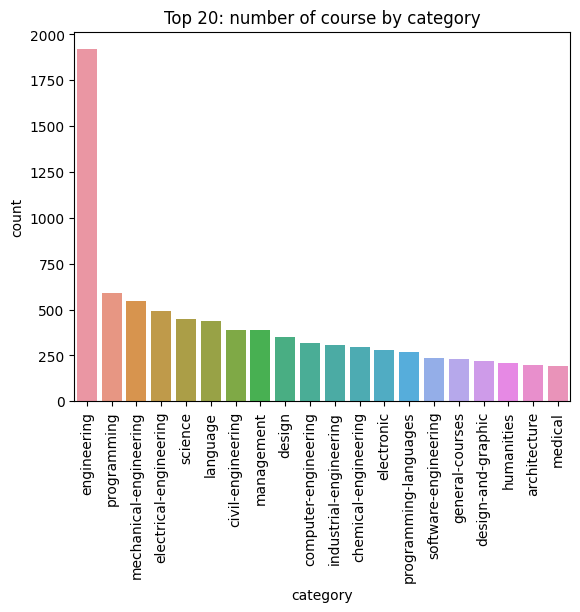

In [21]:
sns.barplot( cat_df.sort_values( "count", axis=0, ascending=False).head( 20), x="category", y="count")
plt.title( "Top 20: number of course by category")
plt.xticks( rotation=90)
plt.show()

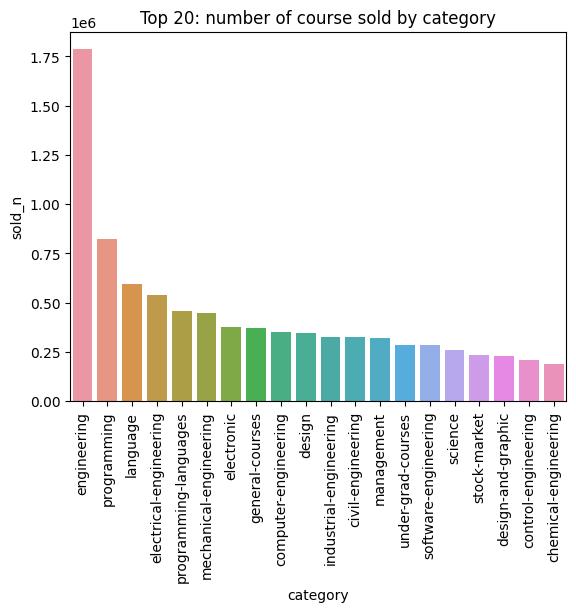

In [22]:
sns.barplot( cat_df.sort_values( "sold_n", axis=0, ascending=False).head( 20), x="category", y="sold_n")
plt.title( "Top 20: number of course sold by category")
plt.xticks( rotation=90)
plt.show()

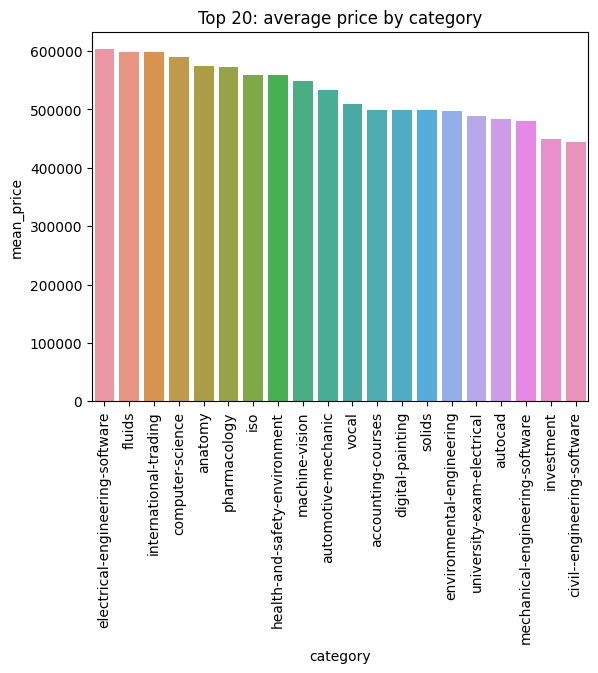

In [23]:
sns.barplot( cat_df.sort_values( "mean_price", axis=0, ascending=False).head( 20), x="category", y="mean_price")
plt.title( "Top 20: average price by category")
plt.xticks( rotation=90)
plt.show()

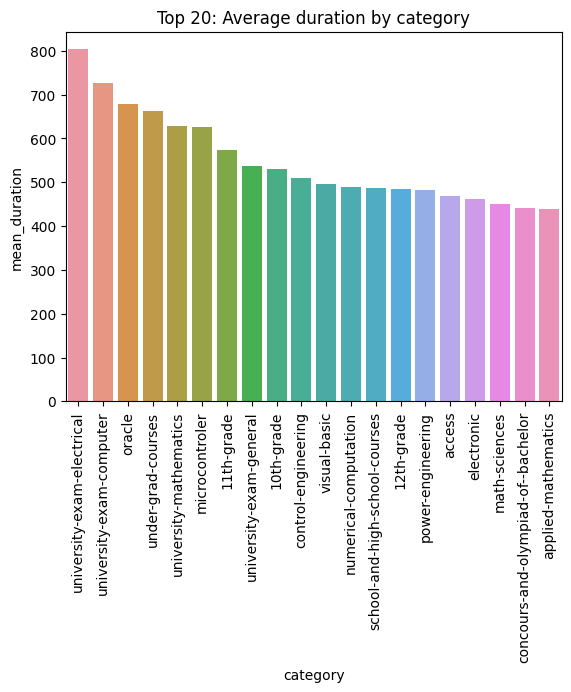

In [24]:
sns.barplot( cat_df.sort_values( "mean_duration", axis=0, ascending=False).head( 20), x="category", y="mean_duration")
plt.title( "Top 20: Average duration by category")
plt.xticks( rotation=90)
plt.show()

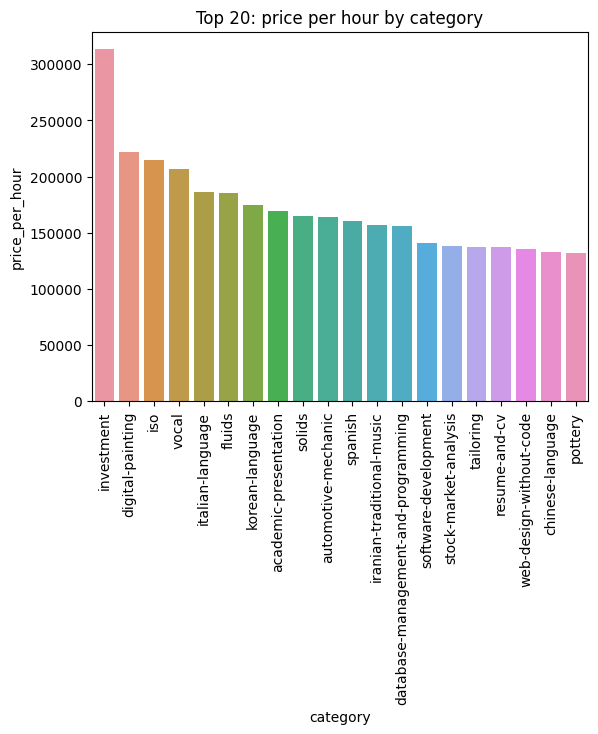

In [25]:
sns.barplot( cat_df.sort_values( "price_per_hour", axis=0, ascending=False).head( 20), x="category", y="price_per_hour")
plt.title( "Top 20: price per hour by category")
plt.xticks( rotation=90)
plt.show()